In [156]:
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import numpy as np
import hvplot.pandas

from MCForecastTools import MCSimulation
%matplotlib inline

In [157]:
API_Key = 'A9HTPYBVOW6MI2HN'

In [ ]:
AlphaVantage

In [162]:
#Stock API 

Ticker = ()

SP500_api = pd.read_csv(f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&apikey={API_Key}&datatype=csv&outputsize=full').set_index('timestamp')

SP500_api



,open,high,low,close,volume
timestamp,,,,,
2022-02-18,437.3300,438.6600,431.8200,434.2300,129319844
2022-02-17,443.2200,446.5652,436.4200,437.0600,102259108
2022-02-16,443.9300,448.0550,441.9400,446.6000,84863585
2022-02-15,443.7300,446.2800,443.1800,446.1000,88659503
2022-02-14,439.9200,441.6000,435.3400,439.0200,123006262
...,...,...,...,...,...
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300


In [163]:
#a = df.sort_values(by ='Science', ascending = 0)
descend_SP500_df = SP500_api.sort_values(by ='timestamp', ascending = 1)

descend_SP500_df

,open,high,low,close,volume
timestamp,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500
...,...,...,...,...,...
2022-02-14,439.9200,441.6000,435.3400,439.0200,123006262
2022-02-15,443.7300,446.2800,443.1800,446.1000,88659503
2022-02-16,443.9300,448.0550,441.9400,446.6000,84863585


In [164]:
# Create DataFrame for close
SP500_close = descend_SP500_df.filter(['timestamp', 'close'])



SP500_close

,close
timestamp,
1999-11-01,135.5625
1999-11-02,134.5937
1999-11-03,135.5000
1999-11-04,136.5312
1999-11-05,137.8750
...,...
2022-02-14,439.0200
2022-02-15,446.1000
2022-02-16,446.6000


<AxesSubplot:title={'center':'SP500 Close Prices Sept 28, 2021 - Feb 17, 2022'}, xlabel='timestamp', ylabel='Close Prices'>

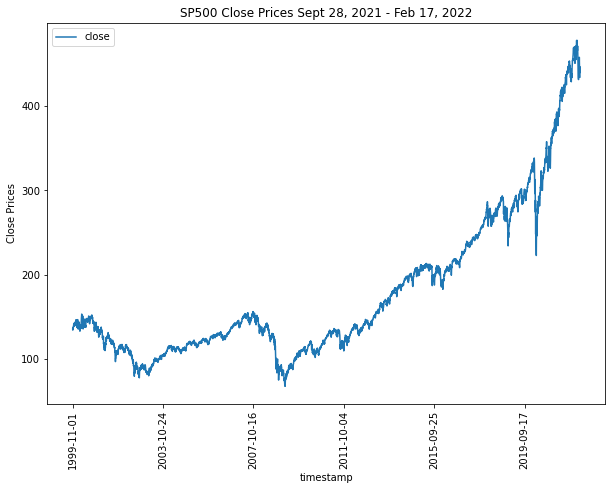

In [165]:
SP500_close.plot.line(
    y='close',
    xlabel='timestamp',
    ylabel='Close Prices',
    rot=90,
    title='SP500 Close Prices Sept 28, 2021 - Feb 17, 2022',
    figsize=(10,7)

)

In [166]:
SP500_daily_returns = (SP500_close['close'].pct_change().dropna()).to_frame()

SP500_daily_returns

,close
timestamp,
1999-11-02,-0.007147
1999-11-03,0.006734
1999-11-04,0.007610
1999-11-05,0.009842
1999-11-08,0.000907
...,...
2022-02-14,-0.003269
2022-02-15,0.016127
2022-02-16,0.001121


In [167]:
test_crypto_api = pd.read_csv(f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=CNY&apikey={API_Key}&datatype=csv').set_index('timestamp')

In [168]:
test_crypto_api.head()

,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
timestamp,,,,,,,,,,
2022-02-18,256792.621551,257501.664798,255425.430000,257484.932214,40515.71,40627.58,40300.00,40624.94,1214.12500,1214.12500
2022-02-17,278075.010636,279920.348451,253988.012301,256792.558170,43873.56,44164.71,40073.21,40515.70,47245.99494,47245.99494
2022-02-16,282329.713785,282362.164857,274484.096700,278075.010636,44544.85,44549.97,43307.00,43873.56,28471.87270,28471.87270
2022-02-15,269597.041314,283638.848340,268906.758843,282329.777166,42535.94,44751.40,42427.03,44544.86,38095.19576,38095.19576
2022-02-14,266540.239065,271539.415440,263351.604336,269597.041314,42053.65,42842.40,41550.56,42535.94,34010.13060,34010.13060


## Analyzing the Performance

In [169]:
#a = df.sort_values(by ='Science', ascending = 0)
ascend_df = test_crypto_api.sort_values(by ='timestamp', ascending = 1)

ascend_df

,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
timestamp,,,,,,,,,,
2019-05-26,50850.576300,55394.994000,49648.999302,54599.118783,8023.00,8740.00,7833.42,8614.43,49652.144567,49652.144567
2019-05-27,54587.139774,56461.822992,54437.940900,55498.431792,8612.54,8908.32,8589.00,8756.32,51886.768793,51886.768793
2019-05-28,55474.347012,55765.709469,53941.224003,55240.597884,8752.52,8798.49,8510.63,8715.64,31470.551534,31470.551534
2019-05-29,55248.393747,55458.375000,53281.871460,54797.184408,8716.87,8750.00,8406.60,8645.68,33880.865922,33880.865922
2019-05-30,54802.381650,57513.567306,50736.490500,52413.171474,8646.50,9074.26,8005.00,8269.54,70379.998521,70379.998521
...,...,...,...,...,...,...,...,...,...,...
2022-02-14,266540.239065,271539.415440,263351.604336,269597.041314,42053.65,42842.40,41550.56,42535.94,34010.130600,34010.130600
2022-02-15,269597.041314,283638.848340,268906.758843,282329.777166,42535.94,44751.40,42427.03,44544.86,38095.195760,38095.195760
2022-02-16,282329.713785,282362.164857,274484.096700,278075.010636,44544.85,44549.97,43307.00,43873.56,28471.872700,28471.872700


In [191]:
# Create DataFrame for close
BTC_close = ascend_df.filter(['timestamp', 'close (USD)'])



BTC_close

,close (USD)
timestamp,
2019-05-26,8614.43
2019-05-27,8756.32
2019-05-28,8715.64
2019-05-29,8645.68
2019-05-30,8269.54
...,...
2022-02-14,42535.94
2022-02-15,44544.86
2022-02-16,43873.56


<AxesSubplot:title={'center':'BTC Close Prices May 26, 2019 - Feb 17, 2022'}, xlabel='Timestamp', ylabel='Close Prices'>

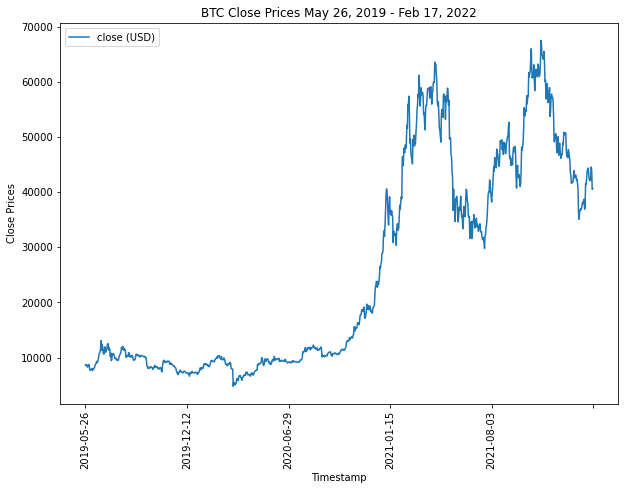

In [192]:
BTC_close.plot.line(
    y='close (USD)',
    xlabel='Timestamp',
    ylabel='Close Prices',
    rot=90,
    title='BTC Close Prices May 26, 2019 - Feb 17, 2022',
    figsize=(10,7)

)

In [193]:
BTC_daily_returns = BTC_close['close (USD)'].pct_change().dropna()

BTC_daily_returns

timestamp
2019-05-27    0.016471
2019-05-28   -0.004646
2019-05-29   -0.008027
2019-05-30   -0.043506
2019-05-31    0.034519
                ...   
2022-02-14    0.011468
2022-02-15    0.047229
2022-02-16   -0.015070
2022-02-17   -0.076535
2022-02-18    0.002696
Name: close (USD), Length: 999, dtype: float64

In [194]:
# Generate summary statistics for the `daily_returns_df` DataFrame
BTC_daily_returns.describe()


count    999.000000
mean       0.002380
std        0.040051
min       -0.395048
25%       -0.016045
50%        0.001431
75%        0.021256
max        0.195361
Name: close (USD), dtype: float64

<AxesSubplot:title={'center':'Daily % Returns'}, xlabel='Days', ylabel='Daily % Returns'>

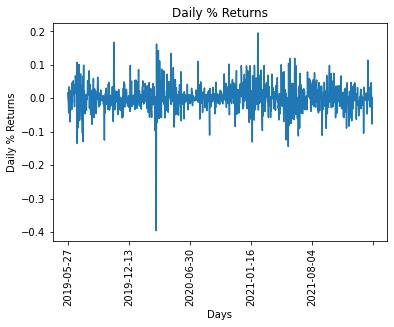

In [195]:
BTC_daily_returns.plot(
    x='timestamp',
    y='% returns',
    xlabel='Days',
    ylabel='Daily % Returns',
    rot=90,
    title='Daily % Returns'
)

In [175]:
#BTC_close["close (USD)"]
#daily_returns =

#daily_returns_df = BTC_close.concat(['daily_returns'])

#daily_returns_df = BTC_close.join(daily_returns.set_index('Col1'), on='Col3')

In [176]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
cumulative_returns = (1 + BTC_daily_returns).cumprod()
columns = ['cumulative_returns']
cumulative_returns.columns = columns

# Review the cumulative returns DataFrame
cumulative_returns.head()

timestamp
2019-05-27    1.016471
2019-05-28    1.011749
2019-05-29    1.003628
2019-05-30    0.959964
2019-05-31    0.993101
Name: close (USD), dtype: float64

<AxesSubplot:title={'center':'Cumulative % Returns'}, xlabel='Days', ylabel='Cumulative % Returns'>

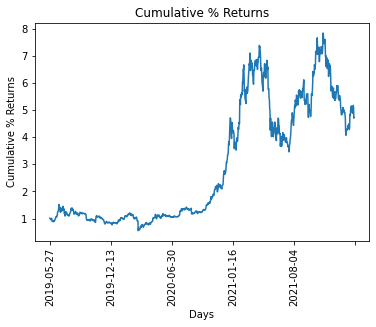

In [177]:
cumulative_returns.plot(
    x='',
    y='',
    rot=90,
    xlabel='Days',
    ylabel='Cumulative % Returns',
    title='Cumulative % Returns'
)

### Analyze the Volatility

Analyze the volatility of portfolios and of the S&P 500 Index by using box plots.

<AxesSubplot:title={'center':'Box Plot of Daily Returns'}>

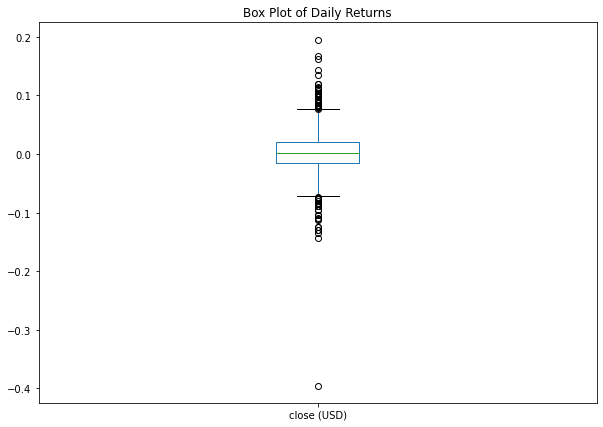

In [178]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
BTC_daily_returns.plot(kind = "box", figsize = (10, 7), title = "Box Plot of Daily Returns")

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [179]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
BTC_daily_std_dv = BTC_daily_returns.std()
BTC_daily_std_dv

0.040050512344455

In [180]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
BTC_annualized_std_dv = BTC_daily_std_dv * np.sqrt(252)
BTC_annualized_std_dv

0.6357821732649024

<AxesSubplot:title={'center':'BTC 21-Day Rolling Standard Deviations'}, xlabel='timestamp'>

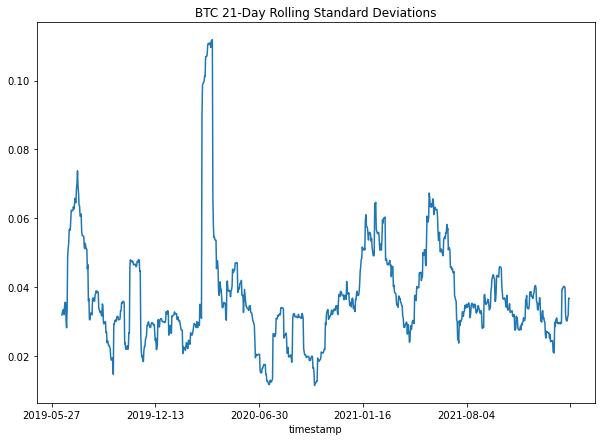

In [181]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
BTC_annualized_std_dv_21roll = BTC_daily_returns.rolling(window=21).std()
BTC_annualized_std_dv_21roll.plot(figsize = (10, 7), title="BTC 21-Day Rolling Standard Deviations")

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [182]:
# Use 252 as the number of trading days in the year
year_trading_days = 252

# Calculate the annual average return data for the for fund portfolios and the S&P 500
BTC_annual_avg_return = BTC_daily_returns.mean() * year_trading_days

# Review the annual average returns sorted from lowest to highest

BTC_annual_avg_return

0.5997762765379506

In [183]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharpe_ratios = BTC_annual_avg_return/BTC_annualized_std_dv


# Review the Sharpe ratios 
sharpe_ratios

0.9433675585113493

In [184]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
#sharpe_ratios.plot.bar(title = "Sharpe Ratios")

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

In [196]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_var = SP500_daily_returns.rolling(window=60).var().dropna()

sp500_var

,close
timestamp,
2000-01-27,0.000161
2000-01-28,0.000177
2000-01-31,0.000189
2000-02-01,0.000189
2000-02-02,0.000188
...,...
2022-02-14,0.000137
2022-02-15,0.000141
2022-02-16,0.000141


In [197]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
BTC_covariance_rolling_60 = BTC_daily_returns.rolling(window=60).cov(BTC_daily_returns)
BTC_covariance_rolling_60.tail()

timestamp
2022-02-14    0.000885
2022-02-15    0.000908
2022-02-16    0.000907
2022-02-17    0.001003
2022-02-18    0.001003
Name: close (USD), dtype: float64

In [198]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
BTC_beta_60_roll = (BTC_covariance_rolling_60 / sp500_var).dropna()
BTC_beta_60_roll.tail()

,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05,...,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,close
timestamp,,,,,,,,,,,,,,,,,,,,,


In [199]:
# Calculate the average of the 60-day rolling beta
avg_beta_60_rolling = BTC_beta_60_roll.mean()
avg_beta_60_rolling

2019-05-27   NaN
2019-05-28   NaN
2019-05-29   NaN
2019-05-30   NaN
2019-05-31   NaN
              ..
2022-02-15   NaN
2022-02-16   NaN
2022-02-17   NaN
2022-02-18   NaN
close        NaN
Length: 1000, dtype: float64

<AxesSubplot:title={'center':'BTC SP500 : 60-Day Rolling Variance'}, xlabel='Days', ylabel='Beta'>

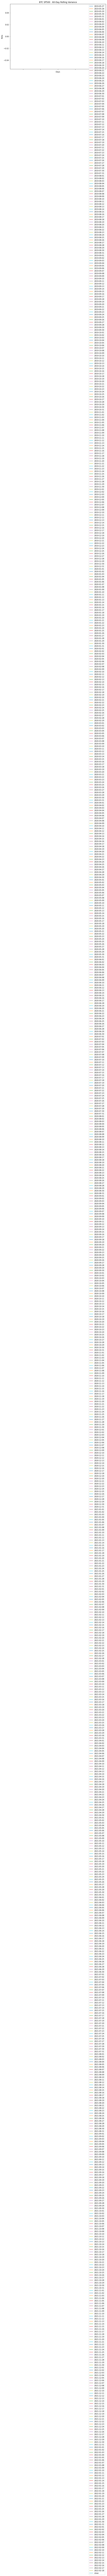

In [189]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
BTC_beta_60_roll.plot(
    xlabel='Days',
    ylabel='Beta',
    figsize=(10,7), 
    title='BTC SP500 : 60-Day Rolling Variance'
)

## Monte Carlo Simulation to Forecast 1, 3, 5 yr time periods

In [190]:
# Configure the Monte Carlo simulation to forecast 1 year cumulative returns
# The weights are equal
# Run 500 samples.
MC_3_year_cumulative = MCSimulation(
    portfolio_data = sp500_var,
    weights=[1.0],
    num_simulation = 100,
    num_trading_days = 252 
)

# Review the simulation input data
MC_3_year_cumulative.portfolio_data.head()

IndexError: Too many levels: Index has only 1 level, not 2

Financial Analysis

Summary Statistics


Daily Returns for 1 year

In [143]:
# Calulate the 1 year daily returns

BTC_Daily_Returns_2021 = test_crypto_api(column='close(USD)').pct_change()

TypeError: 'DataFrame' object is not callable

In [146]:
daily_returns_by_year = (BTC_daily_returns.groupby('timestamp').mean())

daily_returns_by_year

timestamp
2019-05-27    0.016471
2019-05-28   -0.004646
2019-05-29   -0.008027
2019-05-30   -0.043506
2019-05-31    0.034519
                ...   
2022-02-14    0.011468
2022-02-15    0.047229
2022-02-16   -0.015070
2022-02-17   -0.076535
2022-02-18    0.002696
Name: close (USD), Length: 999, dtype: float64